In [1]:
import pickle
import os
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.simplefilter('ignore')
from platform import python_version
print(python_version())

3.8.8


In [2]:
resultsDict = {}
for file in os.listdir('./outputs/classification/inter-subject'):
    infile = open('./outputs/classification/inter-subject/' + file, 'rb')
    resultsDict['{}'.format(file)] = pickle.load(infile)
    infile.close()

In [3]:
for key in resultsDict.keys():
    Y_true_pred = resultsDict[key]['TruePredY']
    best_accuracy = accuracy_score(Y_true_pred['True'], Y_true_pred['Predicted'])
    print('Test accuracy for {0:} is: {1:.2f}'.format(key, best_accuracy))

Test accuracy for Fold1_FrequencyAll_KNN_128.pickle is: 0.85
Test accuracy for Fold1_FrequencyAll_KNN_320.pickle is: 0.90
Test accuracy for Fold1_FrequencyAll_RandomForest_128.pickle is: 0.87
Test accuracy for Fold1_FrequencyAll_RandomForest_320.pickle is: 0.94
Test accuracy for Fold1_FrequencyAll_SVC_128.pickle is: 0.90
Test accuracy for Fold1_FrequencyAll_SVC_320.pickle is: 0.95
Test accuracy for Fold1_TimeFrequency_KNN_128.pickle is: 0.93
Test accuracy for Fold1_TimeFrequency_KNN_320.pickle is: 0.98
Test accuracy for Fold1_TimeFrequency_RandomForest_128.pickle is: 0.93
Test accuracy for Fold1_TimeFrequency_RandomForest_320.pickle is: 0.97
Test accuracy for Fold1_TimeFrequency_SVC_128.pickle is: 0.94
Test accuracy for Fold1_TimeFrequency_SVC_320.pickle is: 0.98
Test accuracy for Fold1_Time_KNN_128.pickle is: 0.85
Test accuracy for Fold1_Time_KNN_320.pickle is: 0.94
Test accuracy for Fold1_Time_RandomForest_128.pickle is: 0.88
Test accuracy for Fold1_Time_RandomForest_320.pickle is: 0

In [6]:
columns = ['test_set', 'window_len', 'feature_set', 'classifier', 'overall_accuracy']
accuracy_df = pd.DataFrame(columns=columns)

for key in resultsDict.keys():
    tmp_str_split = key[:-7].split('_')
    test_set = tmp_str_split[0][-1]
    feature = tmp_str_split[1]
    classifier = tmp_str_split[2]
    window_length = tmp_str_split[3]
    
    Y_true_pred = resultsDict[key]['TruePredY']
    overall_accuracy = accuracy_score(Y_true_pred['True'], Y_true_pred['Predicted'])
    
    accuracy_df = accuracy_df.append({'test_set': test_set, 'window_len': window_length, 'feature_set': feature, 'classifier': classifier, 'overall_accuracy': overall_accuracy},
                                     ignore_index=True)

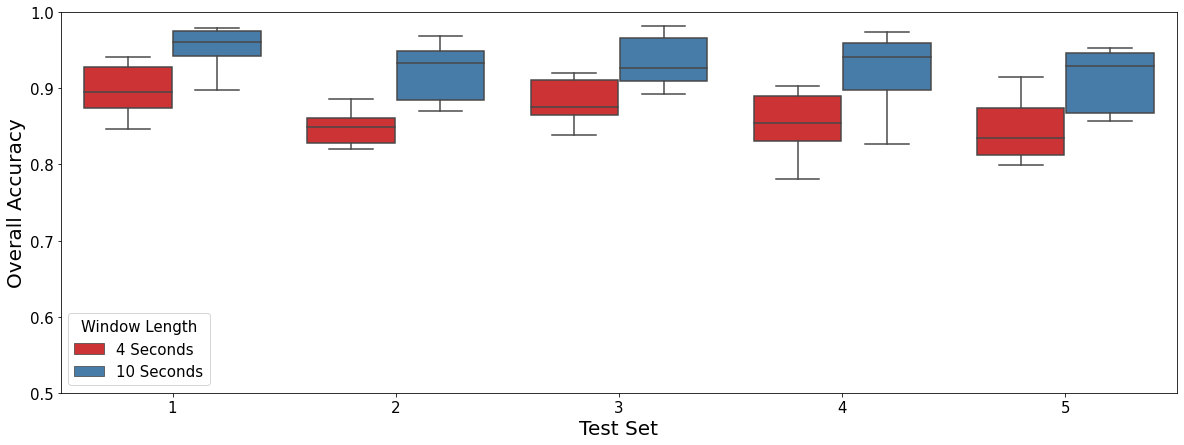

In [40]:
f, ax = plt.subplots(1, figsize=(20, 7))
sns.boxplot(x='test_set', y='overall_accuracy', hue='window_len', data=accuracy_df, ax=ax, palette='Set1')
ax.set_ylabel('Overall Accuracy', fontsize=20)
ax.set_xlabel('Test Set', fontsize=20)
ax.set_ylim([0.5, 1])
ax.tick_params(axis='both', which='major', labelsize=15)
lgnd = ax.legend(title='Window Length', fontsize=15)
lgnd.get_title().set_fontsize('15')
lgnd.texts[0].set_text('4 Seconds')
lgnd.texts[1].set_text('10 Seconds')
plt.show()

## Tests Subjects

> `Test Set 1`: **26, 32, 21, 9, 13, 20, 12, 24**

> `Test Set 2`: **41, 37, 42, 35, 43, 11, 23, 39**  --> 1 left handed

> `Test Set 3`: **14, 22, 18, 17, 28, 33, 38**

> `Test Set 4`: **34, 19, 44, 31, 29, 40, 27**  --> 1 left handed

> `Test Set 5`: **16, 30, 8, 10, 15, 25, 36**


**Left handed subjects: 19 & 35 subject**

# 2-Way ANOVA for Classifiers and Feature Sets

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

## All Window Lengths

In [42]:
model = ols('overall_accuracy ~ C(classifier) + C(feature_set) + C(classifier):C(feature_set)', data=accuracy_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(classifier),0.013198,2.0,3.871386,2.478890e-02
C(feature_set),0.067041,2.0,19.665882,1.092048e-07
C(classifier):C(feature_set),0.006883,4.0,1.009555,4.075045e-01
Residual,0.138065,81.0,NaN,NaN


## 10 Seconds Window Lengths

In [13]:
accuracy_10sec_df = accuracy_df[accuracy_df['window_len']=='320']

model = ols('overall_accuracy ~ C(classifier) + C(feature_set) + C(classifier):C(feature_set)', data=accuracy_10sec_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(classifier),0.007783,2.0,6.035505,5.489673e-03
C(feature_set),0.035423,2.0,27.470017,5.699713e-08
C(classifier):C(feature_set),0.004962,4.0,1.923973,1.275482e-01
Residual,0.023211,36.0,NaN,NaN


## 4 Seconds Window Lengths

In [14]:
accuracy_4sec_df = accuracy_df[accuracy_df['window_len']=='128']

model = ols('overall_accuracy ~ C(classifier) + C(feature_set) + C(classifier):C(feature_set)', data=accuracy_4sec_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(classifier),0.006253,2.0,4.713828,1.519424e-02
C(feature_set),0.033149,2.0,24.988528,1.565160e-07
C(classifier):C(feature_set),0.002337,4.0,0.880840,4.850895e-01
Residual,0.023879,36.0,NaN,NaN
